In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    X_train = train.values[0:train_row,1:] #take all rows and thier col 1:
    y_train = train.values[0:train_row,0] #lable
    
    print(type(train))
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values
    Pred_test = Pred_test[:train_row]
    return X_train, y_train, Pred_test

train_row = 5000
data_dir = "/Users/Galen/Desktop/AI/1all/"
Origin_X_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)


(42000, 785)
<class 'pandas.core.frame.DataFrame'>


In [22]:
print(type(Origin_y_test))
Origin_X_train[:2,:3]

<class 'numpy.ndarray'>


array([[0, 0, 0],
       [0, 0, 0]])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train,Origin_y_train,test_size =0.2, random_state =0)
print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [24]:
class knn():
    
    def __init__(self):
        pass
    
    def train(self, X, y):
        #x is the feature of the trainning data
        #y is the label vector of the traning data
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, num, k):
        # X is the feature of the data to predict
        dataSet = X_train
        labels = y_train
        dataSetSize = dataSet.shape[0]
        
        
        #np.tile: repeat an array several times
        # a = np.array([0,1,2])
        # np.tile(a,(2,3))
        #array([[0,1,2,0,1,2,0,1,2],[0,1,2,0,1,2,0,1,2])
        
        
    
        diffMat = np.tile(X, (dataSetSize, 1))-dataSet       # X_repeat-X_train
        
        sqDiffMat = diffMat **2      # sqaure of difference in each dim ofr each inistance
        sumDiffMat = sqDiffMat.sum(axis=1) # sum of eucilidean distance  axis =1 : 是列 col    axis =0 : 是行 row
        distances = sumDiffMat **0.5    # euclidean distance
        
        #np.argsort:return index of elements after sorting in ascending order
        # x = np.array([300, 100, 200])
        # np.argsort(x)
        #array([1,2,0])
        
        sortedDistances =distances.argsort()
        
        
        classCount={} # classcount[i] is the number of times label 'i' appears in top k postions
        for i in range(k):
            vote = labels[sortedDistances[i]]
            classCount[vote] = classCount.get(vote, 0)+1   # 如果编号vote有 则加一，没有 则是0；
        max =0
        ans = 0
        for k, v in classCount.items():
            if (v>max):
                ans = k
                max = v
        
        return ans
    
    

下面进行knn模型训练


In [14]:
from sklearn.metrics import accuracy_score
classifier = knn()
classifier.train(X_train, y_train)
print(type(classifier))
print(type(classifier.predict))
print(type(X_vali[1]))


<class '__main__.knn'>
<class 'method'>
<class 'numpy.ndarray'>


In [18]:
from tqdm import tqdm #进度条
max = 0
ans_k =0

for k in range(1,5):
    print( 'k=',k,'start prediction')
    predictions =np.zeros(len(y_vali)) #生成一个全是o的 那么长的 数组
    for i in tqdm(range(X_vali.shape[0])):
  #  for i in range(X_vali.shape[0]):
   #     if i % 500 ==0:
    #        print(str(i+1) +'/' + str(int(len(X_vali)))+ '....')
        output = classifier.predict(X_vali[i],i,k)
        predictions[i] = output
                  
    accuracy = accuracy_score(y_vali,predictions)
    print('k= ',k,'accuracy =',accuracy)
    if accuracy > max:
        max = accuracy
        ans_k =k


  1%|          | 6/1000 [00:00<00:18, 52.75it/s]

k= 1 start prediction


  1%|          | 6/1000 [00:00<00:17, 55.30it/s]

k=  1 accuracy = 0.919
k= 2 start prediction


  1%|          | 6/1000 [00:00<00:17, 55.56it/s]

k=  2 accuracy = 0.919
k= 3 start prediction


  1%|          | 6/1000 [00:00<00:17, 55.65it/s]

k=  3 accuracy = 0.925
k= 4 start prediction


100%|██████████| 1000/1000 [00:18<00:00, 55.08it/s]

k=  4 accuracy = 0.924


In [17]:
 print('k= ',k,'accuracy =',accuracy)

k=  1 accuracy = 0.924


In [29]:
Origin_y_test.shape


(5000, 784)

In [30]:
k = 3
Origin_y_test = Origin_y_test[:300]
predictions = np.zeros(Origin_y_test.shape[0])
for i in range(Origin_y_test.shape[0]):
    if i %100 ==0:
        print(i, '/', Origin_y_test.shape[0])
    predictions[i] = classifier.predict(Origin_y_test[i],i,k)
    

0 / 300
100 / 300
200 / 300


8.0


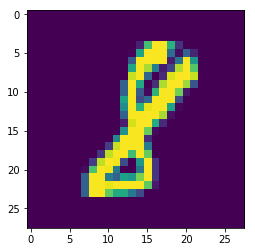

In [38]:
id = 123
print(predictions[id])
plt.imshow(Origin_y_test[id].reshape((28,28)))
plt.show()

In [39]:
out_file = open("predictions.cvs",'w')
out_file.write('ImageID,Label\n')
for i in range(len(predictions)):
    out_file.write(str(i+1)+','+str(int(predictions[i]))+'\n')
out_file.close()